### aim: quick monitor of ongoing GRO2 runs

See process descriptions here:
https://nettle-pajama-b85.notion.site/GRO2-runs-new-ERA-NCEP-comparison-2d95e94bad3342048ed2eb172ad489b7

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [3]:
import numpy as np
w = np.arange(0,10,1)
print(w)

[0 1 2 3 4 5 6 7 8 9]


read1
read2
read3
made breakdown file /gpfs/home/mep22dku/scratch/ModelRuns/modelBreakdownSummaries/TOM12_TJ_GPB0_breakdown.csv
made summary figure TOM12_TJ_GPB0
read1
read2
read3
made breakdown file /gpfs/home/mep22dku/scratch/ModelRuns/modelBreakdownSummaries/TOM12_TJ_GNB0_breakdown.csv
made summary figure TOM12_TJ_GNB0
read1
read2
read3
made breakdown file /gpfs/home/mep22dku/scratch/ModelRuns/modelBreakdownSummaries/TOM12_TJ_GPA1_breakdown.csv
made summary figure TOM12_TJ_GPA1


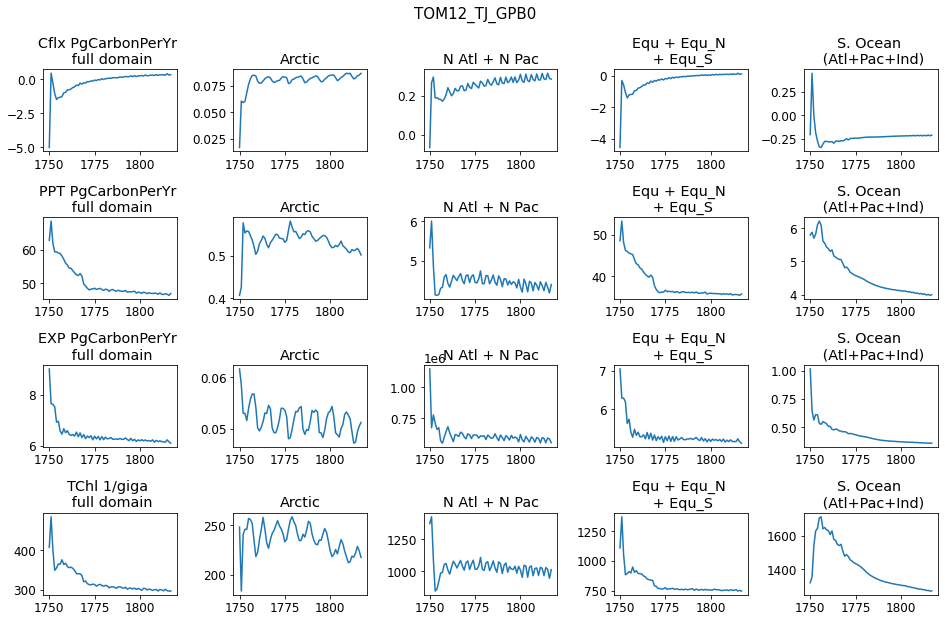

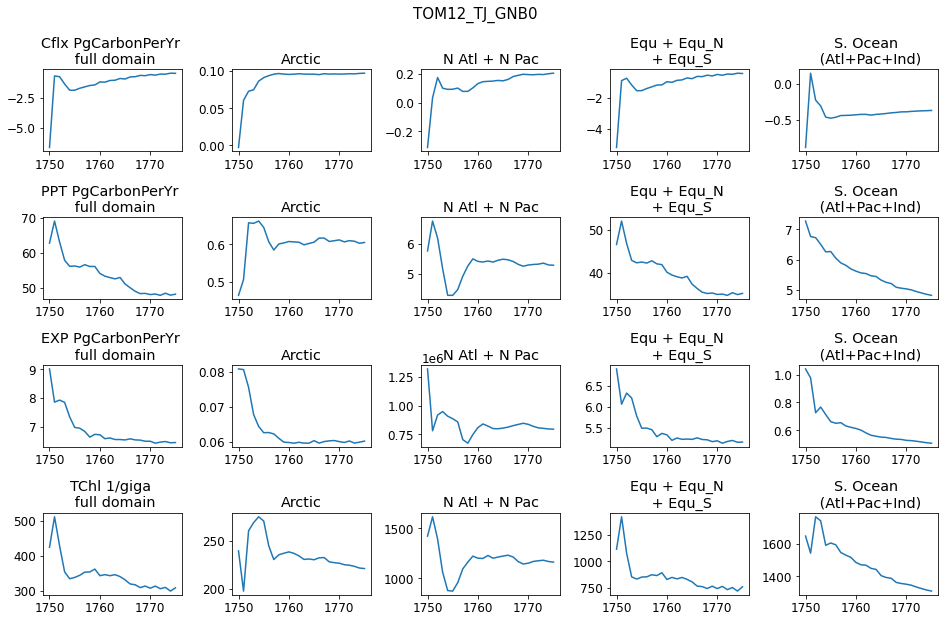

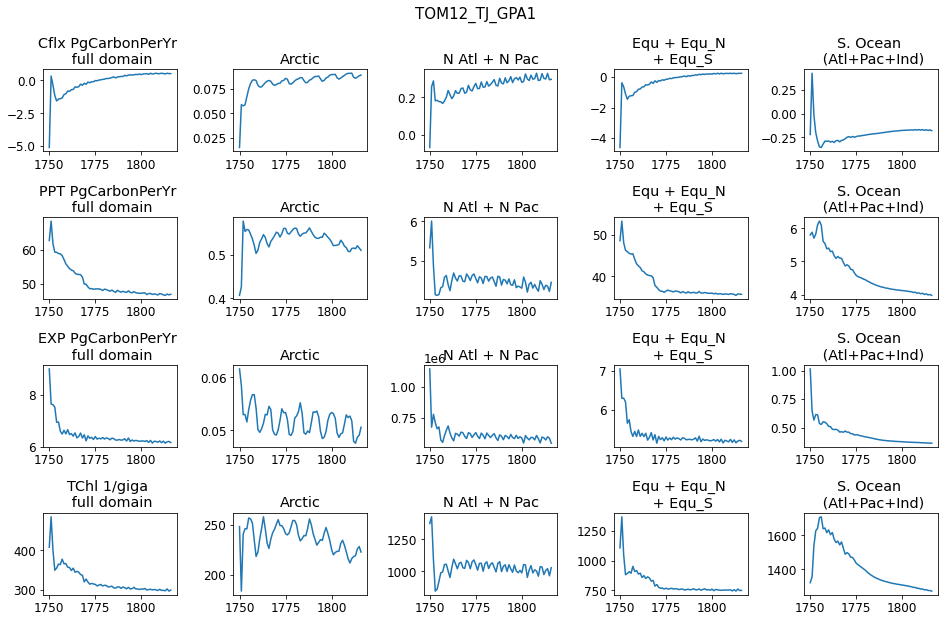

In [52]:
#simple model monitor based on the breakdowns that are created at the end of the model running process. 
#creates a csv summary in pandas and saves it under /gpfs/home/mep22dku/scratch/ModelRuns/modelBreakdownSummaries/{tmod}_breakdown.csv
#creates a picture and saves it under /gpfs/data/greenocean/software/runs/modelMonitor/plots/{tmod}_summary.jpg'


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tmodels = ['TOM12_TJ_GPB0', 'TOM12_TJ_GNB0', 'TOM12_TJ_GPA1']

def makeSummaryFromBreakdowns(tmod, modBaseDir = '/gpfs/home/mep22dku/scratch/ModelRuns/'):
    
    figDir = '/gpfs/data/greenocean/software/runs/modelMonitor/plots/'
    csvDir = '/gpfs/home/mep22dku/scratch/ModelRuns/modelBreakdownSummaries/'
    
    try:
        w = pd.read_csv(f'/{modBaseDir}/{tmod}/breakdown.sur.annual.dat', sep='\t')
        print('read1')
        year = w.year[2:-1].to_numpy().astype(float)
        Cflx_total = w.Cflx[2:-1].to_numpy().astype(float)
        Cflx_Arctic = w['Cflx.1'][2:-1].to_numpy().astype(float)
        Cflx_N_Atl = w['Cflx.2'][2:-1].to_numpy().astype(float)
        Cflx_N_Pac = w['Cflx.3'][2:-1].to_numpy().astype(float)
        Cflx_Equ_N = w['Cflx.4'][2:-1].to_numpy().astype(float)
        Cflx_Equ = w['Cflx.5'][2:-1].to_numpy().astype(float)
        Cflx_Equ_S = w['Cflx.6'][2:-1].to_numpy().astype(float)
        Cflx_SO_Atl = w['Cflx.7'][2:-1].to_numpy().astype(float)
        Cflx_SO_Pac = w['Cflx.8'][2:-1].to_numpy().astype(float)
        Cflx_SO_Ind = w['Cflx.9'][2:-1].to_numpy().astype(float)

        Cflx_SO = Cflx_SO_Atl + Cflx_SO_Pac + Cflx_SO_Ind
        Cflx_Equ_tot = Cflx_Equ_N + Cflx_Equ_S + Cflx_Equ
        Cflx_NANP = Cflx_N_Atl + Cflx_N_Pac

        w = pd.read_csv(f'/{modBaseDir}/{tmod}/breakdown.vol.annual.dat', sep='\t')
        print('read2')
        year = w.year[2:-1].to_numpy().astype(float)
        PPT_total = w.PPT[2:-1].to_numpy().astype(float)
        PPT_Arctic = w['PPT.1'][2:-1].to_numpy().astype(float)
        PPT_N_Atl = w['PPT.2'][2:-1].to_numpy().astype(float)
        PPT_N_Pac = w['PPT.3'][2:-1].to_numpy().astype(float)
        PPT_Equ_N = w['PPT.4'][2:-1].to_numpy().astype(float)
        PPT_Equ = w['PPT.5'][2:-1].to_numpy().astype(float)
        PPT_Equ_S = w['PPT.6'][2:-1].to_numpy().astype(float)
        PPT_SO_Atl = w['PPT.7'][2:-1].to_numpy().astype(float)
        PPT_SO_Pac = w['PPT.8'][2:-1].to_numpy().astype(float)
        PPT_SO_Ind = w['PPT.9'][2:-1].to_numpy().astype(float)

        PPT_SO = PPT_SO_Atl + PPT_SO_Pac + PPT_SO_Ind
        PPT_Equ_tot = PPT_Equ_N + PPT_Equ_S + PPT_Equ
        PPT_NANP = PPT_N_Atl + PPT_N_Pac


        ###
        w = pd.read_csv(f'/{modBaseDir}/{tmod}/breakdown.lev.annual.dat', sep='\t')

        year = w.year[2:-1].to_numpy().astype(float)
        EXP_total = w.EXP[2:-1].to_numpy().astype(float)
        EXP_Arctic = w['EXP.1'][2:-1].to_numpy().astype(float)
        EXP_N_Atl = w['EXP.2'][2:-1].to_numpy().astype(float)
        EXP_N_Pac = w['EXP.3'][2:-1].to_numpy().astype(float)
        EXP_Equ_N = w['EXP.4'][2:-1].to_numpy().astype(float)
        EXP_Equ = w['EXP.5'][2:-1].to_numpy().astype(float)
        EXP_Equ_S = w['EXP.6'][2:-1].to_numpy().astype(float)
        EXP_SO_Atl = w['EXP.7'][2:-1].to_numpy().astype(float)
        EXP_SO_Pac = w['EXP.8'][2:-1].to_numpy().astype(float)
        EXP_SO_Ind = w['EXP.9'][2:-1].to_numpy().astype(float)

        EXP_SO = EXP_SO_Atl + EXP_SO_Pac + EXP_SO_Ind
        EXP_Equ_tot = EXP_Equ_N + EXP_Equ_S + EXP_Equ
        EXP_NANP = EXP_N_Atl + EXP_N_Pac
        ####
        w = pd.read_csv(f'//{modBaseDir}/{tmod}/breakdown.ave.annual.dat', sep='\t')

        year = w.year[2:-1].to_numpy().astype(float)
        TChl_total = w.TChl[2:-1].to_numpy().astype(float)
        TChl_Arctic = w['TChl.1'][2:-1].to_numpy().astype(float)
        TChl_N_Atl = w['TChl.2'][2:-1].to_numpy().astype(float)
        TChl_N_Pac = w['TChl.3'][2:-1].to_numpy().astype(float)
        TChl_Equ_N = w['TChl.4'][2:-1].to_numpy().astype(float)
        TChl_Equ = w['TChl.5'][2:-1].to_numpy().astype(float)
        TChl_Equ_S = w['TChl.6'][2:-1].to_numpy().astype(float)
        TChl_SO_Atl = w['TChl.7'][2:-1].to_numpy().astype(float)
        TChl_SO_Pac = w['TChl.8'][2:-1].to_numpy().astype(float)
        TChl_SO_Ind = w['TChl.9'][2:-1].to_numpy().astype(float)

        TChl_SO = TChl_SO_Atl + TChl_SO_Pac + TChl_SO_Ind
        TChl_Equ_tot = TChl_Equ_N + TChl_Equ_S + TChl_Equ
        TChl_NANP = TChl_N_Atl + TChl_N_Pac
        print('read3')
        df = pd.DataFrame([year,TChl_total,TChl_Arctic,TChl_NANP,TChl_Equ_tot,TChl_SO,
                          PPT_total,PPT_Arctic,PPT_NANP,PPT_Equ_tot,PPT_SO,
                          EXP_total,EXP_Arctic,EXP_NANP,EXP_Equ_tot,EXP_SO,
                          Cflx_total,Cflx_Arctic,Cflx_NANP,Cflx_Equ_tot,Cflx_SO,
                          ]).T
        df.columns = ['year', 'TChl_total','TChl_Arctic','TChl_NANP','TChl_Equ_tot','TChl_SO',
                     'PPT_total','PPT_Arctic','PPT_NANP','PPT_Equ_tot','PPT_SO',
                     'EXP_total','EXP_Arctic','EXP_NANP','EXP_Equ_tot','EXP_SO',
                     'Cflx_total','Cflx_Arctic','Cflx_NANP','Cflx_Equ_tot','Cflx_SO',
                     ]
        df.wheremade = 'GRO2_FORCING_EXPERIMENT/breakdownSummary.ipynb'
        df.notes = 'everything is in PgC/yr except TChl, which is in 1/giga whatever that is'
        df.to_csv(f'{csvDir}{tmod}_breakdown.csv')
        print(f'made breakdown file {csvDir}{tmod}_breakdown.csv')
        
        ##figure 
        fact = 1.1
        fig, axs = plt.subplots(4,5, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
        axs = axs.ravel()

        ind = 0
        axs[0+ind].plot(year, Cflx_total); axs[0].set_title('Cflx PgCarbonPerYr \n full domain')
        axs[1+ind].plot(year, Cflx_Arctic); axs[1].set_title('Arctic')
        axs[2+ind].plot(year, Cflx_NANP); axs[2].set_title('N Atl + N Pac')
        axs[3+ind].plot(year, Cflx_Equ_tot); axs[3].set_title('Equ + Equ_N \n + Equ_S')
        axs[4+ind].plot(year, Cflx_SO); axs[4].set_title('S. Ocean \n (Atl+Pac+Ind)')

        ind = 5
        axs[0+ind].plot(year, PPT_total); axs[0+ind].set_title('PPT PgCarbonPerYr \n full domain')
        axs[1+ind].plot(year, PPT_Arctic); axs[1+ind].set_title('Arctic')
        axs[2+ind].plot(year, PPT_NANP); axs[2+ind].set_title('N Atl + N Pac')
        axs[3+ind].plot(year, PPT_Equ_tot); axs[3+ind].set_title('Equ + Equ_N \n + Equ_S')
        axs[4+ind].plot(year, PPT_SO); axs[4+ind].set_title('S. Ocean \n (Atl+Pac+Ind)')
        ind = 10
        axs[0+ind].plot(year, EXP_total); axs[0+ind].set_title('EXP PgCarbonPerYr \n full domain')
        axs[1+ind].plot(year, EXP_Arctic); axs[1+ind].set_title('Arctic')
        axs[2+ind].plot(year, EXP_NANP); axs[2+ind].set_title('N Atl + N Pac')
        axs[3+ind].plot(year, EXP_Equ_tot); axs[3+ind].set_title('Equ + Equ_N \n + Equ_S')
        axs[4+ind].plot(year, EXP_SO); axs[4+ind].set_title('S. Ocean \n (Atl+Pac+Ind)')
        ind = 15
        axs[0+ind].plot(year, TChl_total); axs[0+ind].set_title('TChl 1/giga \n full domain')
        axs[1+ind].plot(year, TChl_Arctic); axs[1+ind].set_title('Arctic')
        axs[2+ind].plot(year, TChl_NANP); axs[2+ind].set_title('N Atl + N Pac')
        axs[3+ind].plot(year, TChl_Equ_tot); axs[3+ind].set_title('Equ + Equ_N \n + Equ_S')
        axs[4+ind].plot(year, TChl_SO); axs[4+ind].set_title('S. Ocean \n (Atl+Pac+Ind)')

        plt.suptitle(tmod, fontsize = 15)
        plt.tight_layout()
        fig.savefig(f'{figDir}/{tmod}_summary.jpg')
        print(f'made summary figure {tmod}')
        
        
    except:
        print('something awry')
    
    
for model in tmodels:
    makeSummaryFromBreakdowns(model)

In [30]:
modBaseDir = '/gpfs/home/mep22dku/scratch/ModelRuns/'
tmod = 'TOM12_TJ_GPA1'
w = pd.read_csv(f'/{modBaseDir}/{tmod}/breakdown.ave.annual.dat', sep='\t')
w

,year,Fer,Fer.1,Fer.2,Fer.3,Fer.4,Fer.5,Fer.6,Fer.7,Fer.8,...,TChl.1,TChl.2,TChl.3,TChl.4,TChl.5,TChl.6,TChl.7,TChl.8,TChl.9,Unnamed: 21
0,NaN,1/giga,1/giga,1/giga,1/giga,1/giga,1/giga,1/giga,1/giga,1/giga,...,1/giga,1/giga,1/giga,1/giga,1/giga,1/giga,1/giga,1/giga,1/giga,NaN
1,NaN,total,Arctic,N_Atl,N_Pac,Equ_N,Equ,Equ_S,SO_Atl,SO_Pac,...,Arctic,N_Atl,N_Pac,Equ_N,Equ,Equ_S,SO_Atl,SO_Pac,SO_Ind,NaN
2,1750.0,4.5567e-01,5.9717e-01,7.9901e-01,6.7931e-01,5.9993e-01,4.1308e-01,3.8378e-01,2.3166e-01,3.1124e-01,...,2.4799e+02,4.6902e+02,9.0331e+02,3.0848e+02,4.2859e+02,3.7170e+02,3.9064e+02,4.7250e+02,4.5729e+02,NaN
3,1751.0,4.2898e-01,5.6092e-01,7.7036e-01,6.1984e-01,5.6497e-01,3.4771e-01,3.8560e-01,2.5706e-01,3.2589e-01,...,1.8365e+02,5.5550e+02,8.6961e+02,3.4678e+02,4.1957e+02,6.0438e+02,4.2840e+02,4.4855e+02,4.7741e+02,NaN
4,1752.0,4.0223e-01,5.4221e-01,7.2655e-01,5.8334e-01,5.2742e-01,3.3141e-01,3.5359e-01,2.4637e-01,2.8709e-01,...,2.4056e+02,5.0262e+02,5.8885e+02,2.3488e+02,3.6042e+02,4.5573e+02,5.0714e+02,5.3343e+02,4.9858e+02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1812.0,2.9479e-01,4.8593e-01,4.8238e-01,4.4700e-01,3.8118e-01,3.0330e-01,1.8329e-01,1.7365e-01,1.9023e-01,...,2.1818e+02,4.0452e+02,5.7082e+02,2.0307e+02,3.1013e+02,2.4337e+02,4.4975e+02,4.1374e+02,4.1418e+02,NaN
65,1813.0,2.9479e-01,4.9678e-01,4.7855e-01,4.4586e-01,3.7970e-01,3.0366e-01,1.8297e-01,1.7347e-01,1.8914e-01,...,2.1898e+02,3.9122e+02,6.1570e+02,1.9674e+02,3.0908e+02,2.3877e+02,4.4900e+02,4.1699e+02,4.1290e+02,NaN
66,1814.0,2.9514e-01,5.0138e-01,4.7098e-01,4.4903e-01,3.8085e-01,3.0373e-01,1.8255e-01,1.7328e-01,1.8944e-01,...,2.2566e+02,3.9371e+02,6.2776e+02,2.0506e+02,3.1367e+02,2.4312e+02,4.4856e+02,4.1287e+02,4.1276e+02,NaN
67,1815.0,2.9455e-01,5.0401e-01,4.7048e-01,4.4296e-01,3.8027e-01,3.0295e-01,1.8251e-01,1.7316e-01,1.8834e-01,...,2.2813e+02,3.9704e+02,5.6837e+02,2.0030e+02,3.1094e+02,2.3841e+02,4.4751e+02,4.1470e+02,4.1170e+02,NaN


In [4]:
# tv = ['sur','obs','vol','lev','int','ave']
# for i in tv:
#     print(i)
#     w = pd.read_csv(f'/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_GN01/breakdown.{i}.annual.dat', sep='\t')
#     print(w.columns)

In [5]:
def makeSummaryFromBreakdowns(tmod):
    
    modBaseDir = '/gpfs/home/mep22dku/scratch/ModelRuns/'
    w = pd.read_csv(f'/{modBaseDir}/{tmod}/breakdown.sur.annual.dat', sep='\t')

    year = w.year[2:-1].to_numpy().astype(float)
    Cflx_total = w.Cflx[2:-1].to_numpy().astype(float)
    Cflx_Arctic = w['Cflx.1'][2:-1].to_numpy().astype(float)
    Cflx_N_Atl = w['Cflx.2'][2:-1].to_numpy().astype(float)
    Cflx_N_Pac = w['Cflx.3'][2:-1].to_numpy().astype(float)
    Cflx_Equ_N = w['Cflx.4'][2:-1].to_numpy().astype(float)
    Cflx_Equ = w['Cflx.5'][2:-1].to_numpy().astype(float)
    Cflx_Equ_S = w['Cflx.6'][2:-1].to_numpy().astype(float)
    Cflx_SO_Atl = w['Cflx.7'][2:-1].to_numpy().astype(float)
    Cflx_SO_Pac = w['Cflx.8'][2:-1].to_numpy().astype(float)
    Cflx_SO_Ind = w['Cflx.9'][2:-1].to_numpy().astype(float)

    Cflx_SO = Cflx_SO_Atl + Cflx_SO_Pac + Cflx_SO_Ind
    Cflx_Equ_tot = Cflx_Equ_N + Cflx_Equ_S + Cflx_Equ
    Cflx_NANP = Cflx_N_Atl + Cflx_N_Pac

    w = pd.read_csv(f'/{modBaseDir}/{tmod}/breakdown.vol.annual.dat', sep='\t')

    year = w.year[2:-1].to_numpy().astype(float)
    PPT_total = w.PPT[2:-1].to_numpy().astype(float)
    PPT_Arctic = w['PPT.1'][2:-1].to_numpy().astype(float)
    PPT_N_Atl = w['PPT.2'][2:-1].to_numpy().astype(float)
    PPT_N_Pac = w['PPT.3'][2:-1].to_numpy().astype(float)
    PPT_Equ_N = w['PPT.4'][2:-1].to_numpy().astype(float)
    PPT_Equ = w['PPT.5'][2:-1].to_numpy().astype(float)
    PPT_Equ_S = w['PPT.6'][2:-1].to_numpy().astype(float)
    PPT_SO_Atl = w['PPT.7'][2:-1].to_numpy().astype(float)
    PPT_SO_Pac = w['PPT.8'][2:-1].to_numpy().astype(float)
    PPT_SO_Ind = w['PPT.9'][2:-1].to_numpy().astype(float)

    PPT_SO = PPT_SO_Atl + PPT_SO_Pac + PPT_SO_Ind
    PPT_Equ_tot = PPT_Equ_N + PPT_Equ_S + PPT_Equ
    PPT_NANP = PPT_N_Atl + PPT_N_Pac


    ###
    w = pd.read_csv(f'/{modBaseDir}/{tmod}/breakdown.lev.annual.dat', sep='\t')

    year = w.year[2:-1].to_numpy().astype(float)
    EXP_total = w.EXP[2:-1].to_numpy().astype(float)
    EXP_Arctic = w['EXP.1'][2:-1].to_numpy().astype(float)
    EXP_N_Atl = w['EXP.2'][2:-1].to_numpy().astype(float)
    EXP_N_Pac = w['EXP.3'][2:-1].to_numpy().astype(float)
    EXP_Equ_N = w['EXP.4'][2:-1].to_numpy().astype(float)
    EXP_Equ = w['EXP.5'][2:-1].to_numpy().astype(float)
    EXP_Equ_S = w['EXP.6'][2:-1].to_numpy().astype(float)
    EXP_SO_Atl = w['EXP.7'][2:-1].to_numpy().astype(float)
    EXP_SO_Pac = w['EXP.8'][2:-1].to_numpy().astype(float)
    EXP_SO_Ind = w['EXP.9'][2:-1].to_numpy().astype(float)

    EXP_SO = EXP_SO_Atl + EXP_SO_Pac + EXP_SO_Ind
    EXP_Equ_tot = EXP_Equ_N + EXP_Equ_S + EXP_Equ
    EXP_NANP = EXP_N_Atl + EXP_N_Pac
    ####
    w = pd.read_csv(f'//{modBaseDir}/{tmod}/breakdown.ave.annual.dat', sep='\t')

    year = w.year[2:-1].to_numpy().astype(float)
    TChl_total = w.TChl[2:-1].to_numpy().astype(float)
    TChl_Arctic = w['TChl.1'][2:-1].to_numpy().astype(float)
    TChl_N_Atl = w['TChl.2'][2:-1].to_numpy().astype(float)
    TChl_N_Pac = w['TChl.3'][2:-1].to_numpy().astype(float)
    TChl_Equ_N = w['TChl.4'][2:-1].to_numpy().astype(float)
    TChl_Equ = w['TChl.5'][2:-1].to_numpy().astype(float)
    TChl_Equ_S = w['TChl.6'][2:-1].to_numpy().astype(float)
    TChl_SO_Atl = w['TChl.7'][2:-1].to_numpy().astype(float)
    TChl_SO_Pac = w['TChl.8'][2:-1].to_numpy().astype(float)
    TChl_SO_Ind = w['TChl.9'][2:-1].to_numpy().astype(float)

    TChl_SO = TChl_SO_Atl + TChl_SO_Pac + TChl_SO_Ind
    TChl_Equ_tot = TChl_Equ_N + TChl_Equ_S + TChl_Equ
    TChl_NANP = TChl_N_Atl + TChl_N_Pac
    #####

    df = pd.DataFrame([year,TChl_total,TChl_Arctic,TChl_NANP,TChl_Equ_tot,TChl_SO,
                      PPT_total,PPT_Arctic,PPT_NANP,PPT_Equ_tot,PPT_SO,
                      EXP_total,EXP_Arctic,EXP_NANP,EXP_Equ_tot,EXP_SO,
                      Cflx_total,Cflx_Arctic,Cflx_NANP,Cflx_Equ_tot,Cflx_SO,
                      ]).T
    df.columns = ['year', 'TChl_total','TChl_Arctic','TChl_NANP','TChl_Equ_tot','TChl_SO',
                 'PPT_total','PPT_Arctic','PPT_NANP','PPT_Equ_tot','PPT_SO',
                 'EXP_total','EXP_Arctic','EXP_NANP','EXP_Equ_tot','EXP_SO',
                 'Cflx_total','Cflx_Arctic','Cflx_NANP','Cflx_Equ_tot','Cflx_SO',
                 ]
    df.wheremade = 'GRO2_FORCING_EXPERIMENT/breakdownSummary.ipynb'
    df.notes = 'everything is in PgC/yr except TChl, which is in 1/giga whatever that is'
    df.to_csv(f'/gpfs/home/mep22dku/scratch/ModelRuns/modelBreakdownSummaries/{tmod}_breakdown.csv')
    print(f'made breakdown file {tmod}')

    fact = 1.1
    fig, axs = plt.subplots(4,5, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    ind = 0
    axs[0+ind].plot(year, Cflx_total); axs[0].set_title('Cflx PgCarbonPerYr \n full domain')
    axs[1+ind].plot(year, Cflx_Arctic); axs[1].set_title('Arctic')
    axs[2+ind].plot(year, Cflx_NANP); axs[2].set_title('N Atl + N Pac')
    axs[3+ind].plot(year, Cflx_Equ_tot); axs[3].set_title('Equ + Equ_N \n + Equ_S')
    axs[4+ind].plot(year, Cflx_SO); axs[4].set_title('S. Ocean \n (Atl+Pac+Ind)')

    ind = 5
    axs[0+ind].plot(year, PPT_total); axs[0+ind].set_title('PPT PgCarbonPerYr \n full domain')
    axs[1+ind].plot(year, PPT_Arctic); axs[1+ind].set_title('Arctic')
    axs[2+ind].plot(year, PPT_NANP); axs[2+ind].set_title('N Atl + N Pac')
    axs[3+ind].plot(year, PPT_Equ_tot); axs[3+ind].set_title('Equ + Equ_N \n + Equ_S')
    axs[4+ind].plot(year, PPT_SO); axs[4+ind].set_title('S. Ocean \n (Atl+Pac+Ind)')
    ind = 10
    axs[0+ind].plot(year, EXP_total); axs[0+ind].set_title('EXP PgCarbonPerYr \n full domain')
    axs[1+ind].plot(year, EXP_Arctic); axs[1+ind].set_title('Arctic')
    axs[2+ind].plot(year, EXP_NANP); axs[2+ind].set_title('N Atl + N Pac')
    axs[3+ind].plot(year, EXP_Equ_tot); axs[3+ind].set_title('Equ + Equ_N \n + Equ_S')
    axs[4+ind].plot(year, EXP_SO); axs[4+ind].set_title('S. Ocean \n (Atl+Pac+Ind)')
    ind = 15
    axs[0+ind].plot(year, TChl_total); axs[0+ind].set_title('TChl 1/giga \n full domain')
    axs[1+ind].plot(year, TChl_Arctic); axs[1+ind].set_title('Arctic')
    axs[2+ind].plot(year, TChl_NANP); axs[2+ind].set_title('N Atl + N Pac')
    axs[3+ind].plot(year, TChl_Equ_tot); axs[3+ind].set_title('Equ + Equ_N \n + Equ_S')
    axs[4+ind].plot(year, TChl_SO); axs[4+ind].set_title('S. Ocean \n (Atl+Pac+Ind)')

    plt.suptitle(tmod, fontsize = 15)
    plt.tight_layout()
    fig.savefig(f'/gpfs/home/mep22dku/scratch/ModelRuns/modelBreakdownSummaries/{tmod}_summary.jpg')
    print(f'made summary figure {tmod}')

made breakdown file TOM12_TJ_GPA1


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


made summary figure TOM12_TJ_GPA1
made breakdown file TOM12_TJ_GPB0
made summary figure TOM12_TJ_GPB0


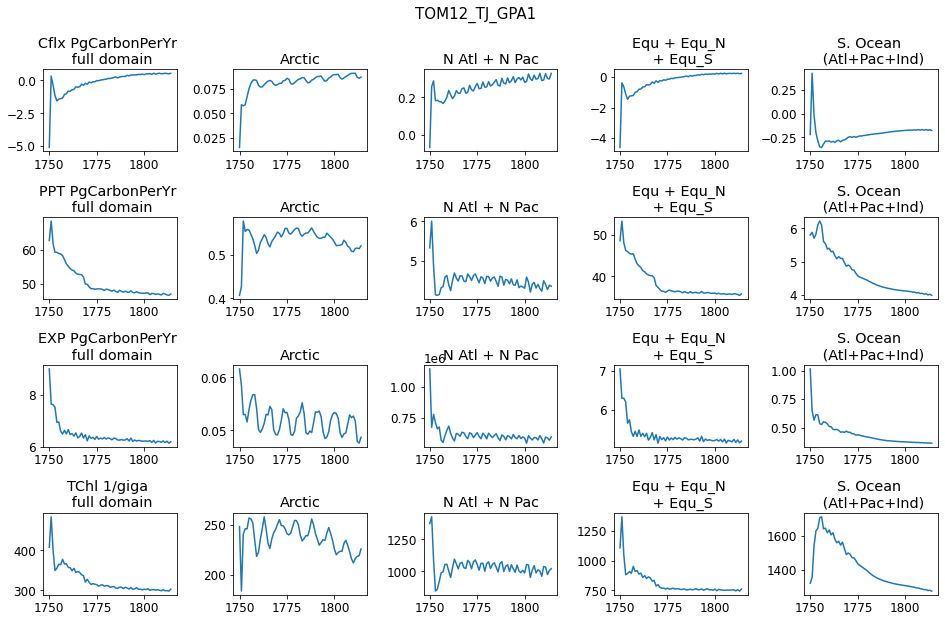

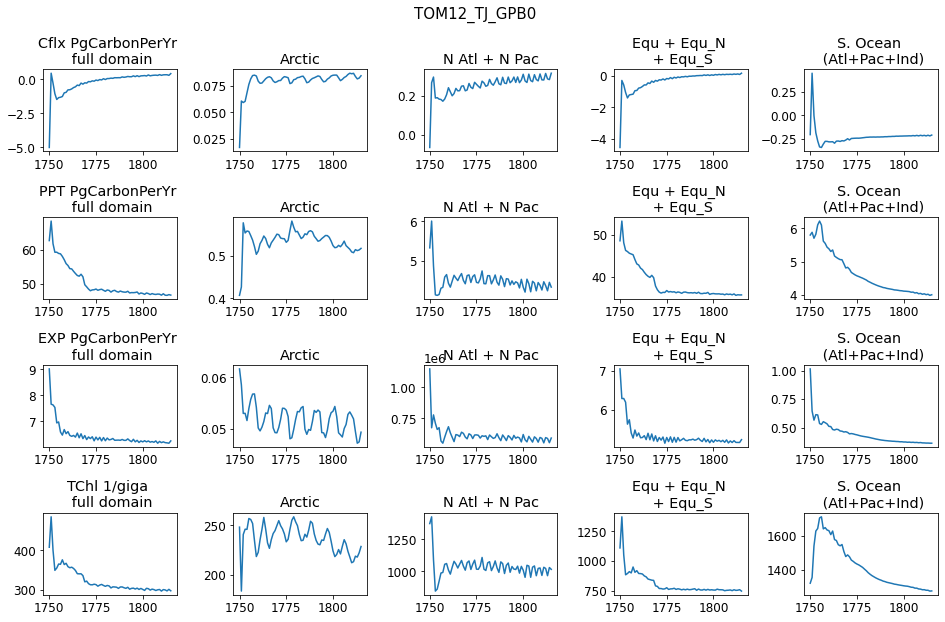

In [6]:
makeSummaryFromBreakdowns('TOM12_TJ_GPA1')
makeSummaryFromBreakdowns('TOM12_TJ_GPB0')



In [7]:
def plot_sum(df, tcol = 'red', tlab = 'G101 (orig ERA)'):
    ind = 0
    axs[0+ind].plot(df.year, df.Cflx_total, color = tcol, label = tlab); 
    axs[1+ind].plot(df.year, df.Cflx_Arctic, color = tcol); 
    axs[2+ind].plot(df.year, df.Cflx_NANP, color = tcol); 
    axs[3+ind].plot(df.year, df.Cflx_Equ_tot, color = tcol); 
    axs[4+ind].plot(df.year, df.Cflx_SO, color = tcol); 
    ind = 5
    axs[0+ind].plot(df.year, df.PPT_total, color = tcol);
    axs[1+ind].plot(df.year, df.PPT_Arctic, color = tcol); 
    axs[2+ind].plot(df.year, df.PPT_NANP, color = tcol); 
    axs[3+ind].plot(df.year, df.PPT_Equ_tot, color = tcol); 
    axs[4+ind].plot(df.year, df.PPT_SO, color = tcol); 
    ind = 10
    axs[0+ind].plot(df.year, df.EXP_total, color = tcol); 
    axs[1+ind].plot(df.year, df.EXP_Arctic, color = tcol); 
    axs[2+ind].plot(df.year, df.EXP_NANP, color = tcol); 
    axs[3+ind].plot(df.year, df.EXP_Equ_tot, color = tcol); 
    axs[4+ind].plot(df.year, df.EXP_SO, color = tcol); 
    ind = 15
    axs[0+ind].plot(df.year, df.TChl_total, color = tcol); 
    axs[1+ind].plot(df.year, df.TChl_Arctic, color = tcol); 
    axs[2+ind].plot(df.year, df.TChl_NANP, color = tcol); 
    axs[3+ind].plot(df.year, df.TChl_Equ_tot, color = tcol); 
    axs[4+ind].plot(df.year, df.TChl_SO, color = tcol); 
    axs[0].legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


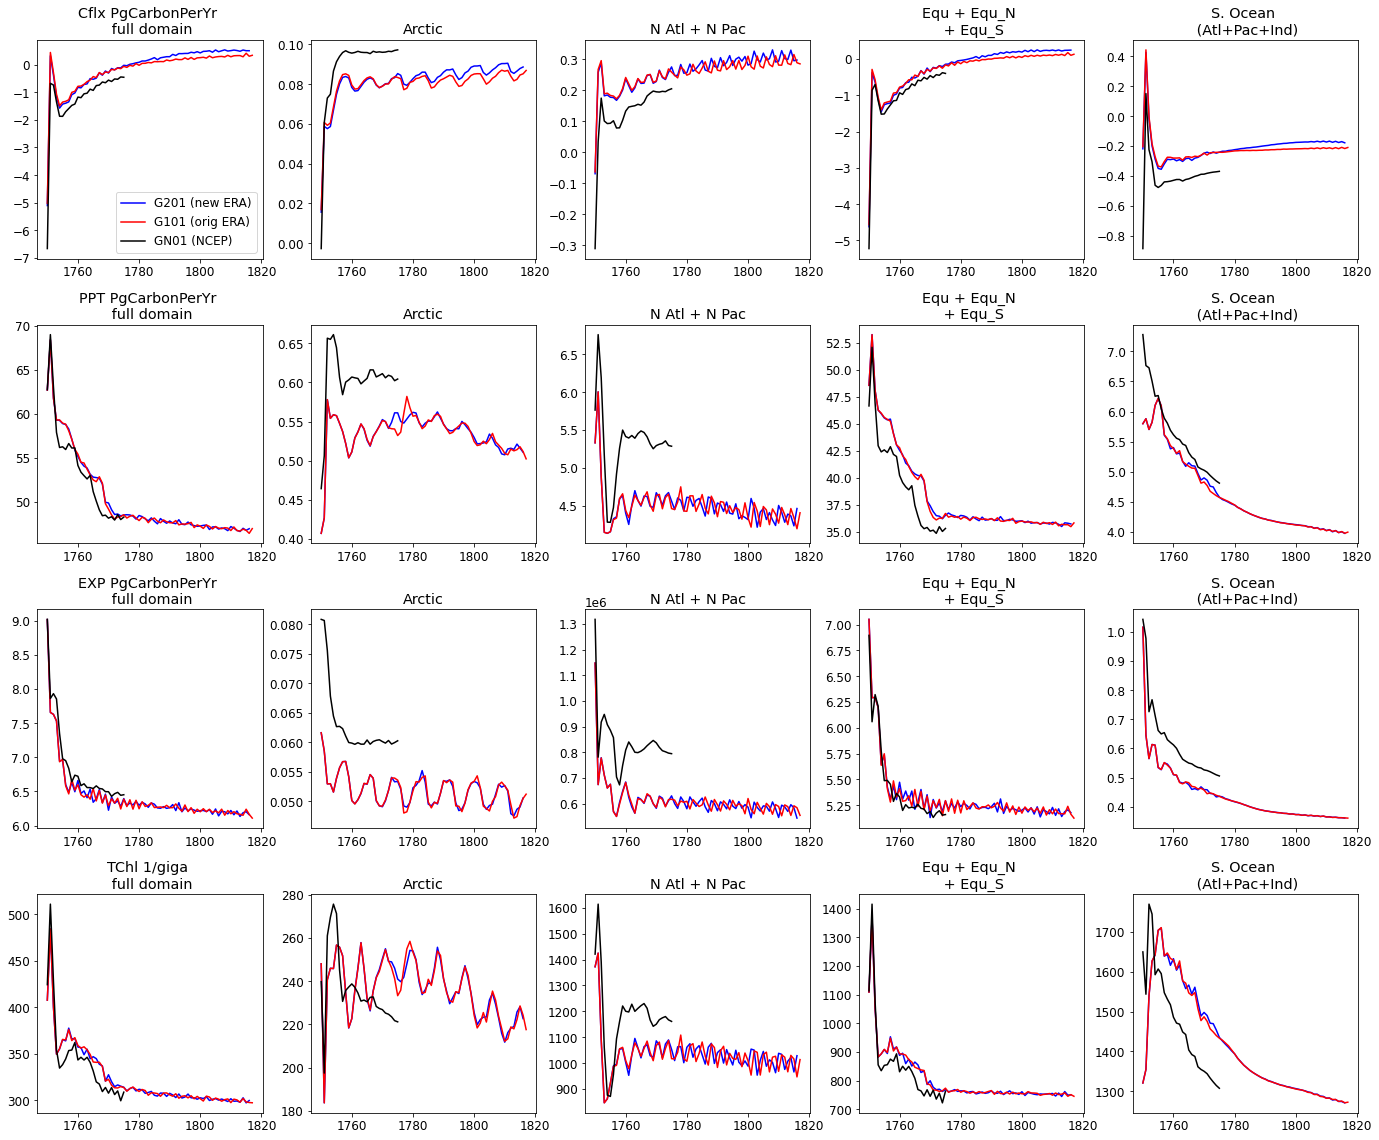

In [63]:
csvDir = '/gpfs/home/mep22dku/scratch/ModelRuns/modelBreakdownSummaries/'
bd_G201 = pd.read_csv(f'/{csvDir}/TOM12_TJ_GPA1_breakdown.csv')
bd_G101 = pd.read_csv(f'/{csvDir}/TOM12_TJ_GPB0_breakdown.csv')
bd_GN01 = pd.read_csv(f'/{csvDir}/TOM12_TJ_GNB0_breakdown.csv')


fact = 1.6
fig, axs = plt.subplots(4,5, figsize=(12*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()



axs[0].set_title('Cflx PgCarbonPerYr \n full domain'); axs[1].set_title('Arctic'); axs[2].set_title('N Atl + N Pac')
axs[3].set_title('Equ + Equ_N \n + Equ_S'); axs[4].set_title('S. Ocean \n (Atl+Pac+Ind)')
ind = 5
axs[0+ind].set_title('PPT PgCarbonPerYr \n full domain'); axs[1+ind].set_title('Arctic')
axs[2+ind].set_title('N Atl + N Pac'); axs[3+ind].set_title('Equ + Equ_N \n + Equ_S'); axs[4+ind].set_title('S. Ocean \n (Atl+Pac+Ind)')
ind = 10
axs[0+ind].set_title('EXP PgCarbonPerYr \n full domain'); axs[1+ind].set_title('Arctic')
axs[2+ind].set_title('N Atl + N Pac'); axs[3+ind].set_title('Equ + Equ_N \n + Equ_S'); axs[4+ind].set_title('S. Ocean \n (Atl+Pac+Ind)')
ind = 15
axs[0+ind].set_title('TChl 1/giga \n full domain'); axs[1+ind].set_title('Arctic')
axs[2+ind].set_title('N Atl + N Pac'); axs[3+ind].set_title('Equ + Equ_N \n + Equ_S'); axs[4+ind].set_title('S. Ocean \n (Atl+Pac+Ind)')

axs[0].legend(loc = 'best')
plt.tight_layout()

plot_sum(bd_G201, tcol = 'b', tlab = 'G201 (new ERA)')
plot_sum(bd_G101, tcol = 'red', tlab = 'G101 (orig ERA)')
plot_sum(bd_GN01, tcol = 'k', tlab = 'GN01 (NCEP)')
# fig.savefig(f'./extracted/{tmod}_summary.jpg')
# print(f'made summary figure {tmod}')

plotted
plotted
plotted


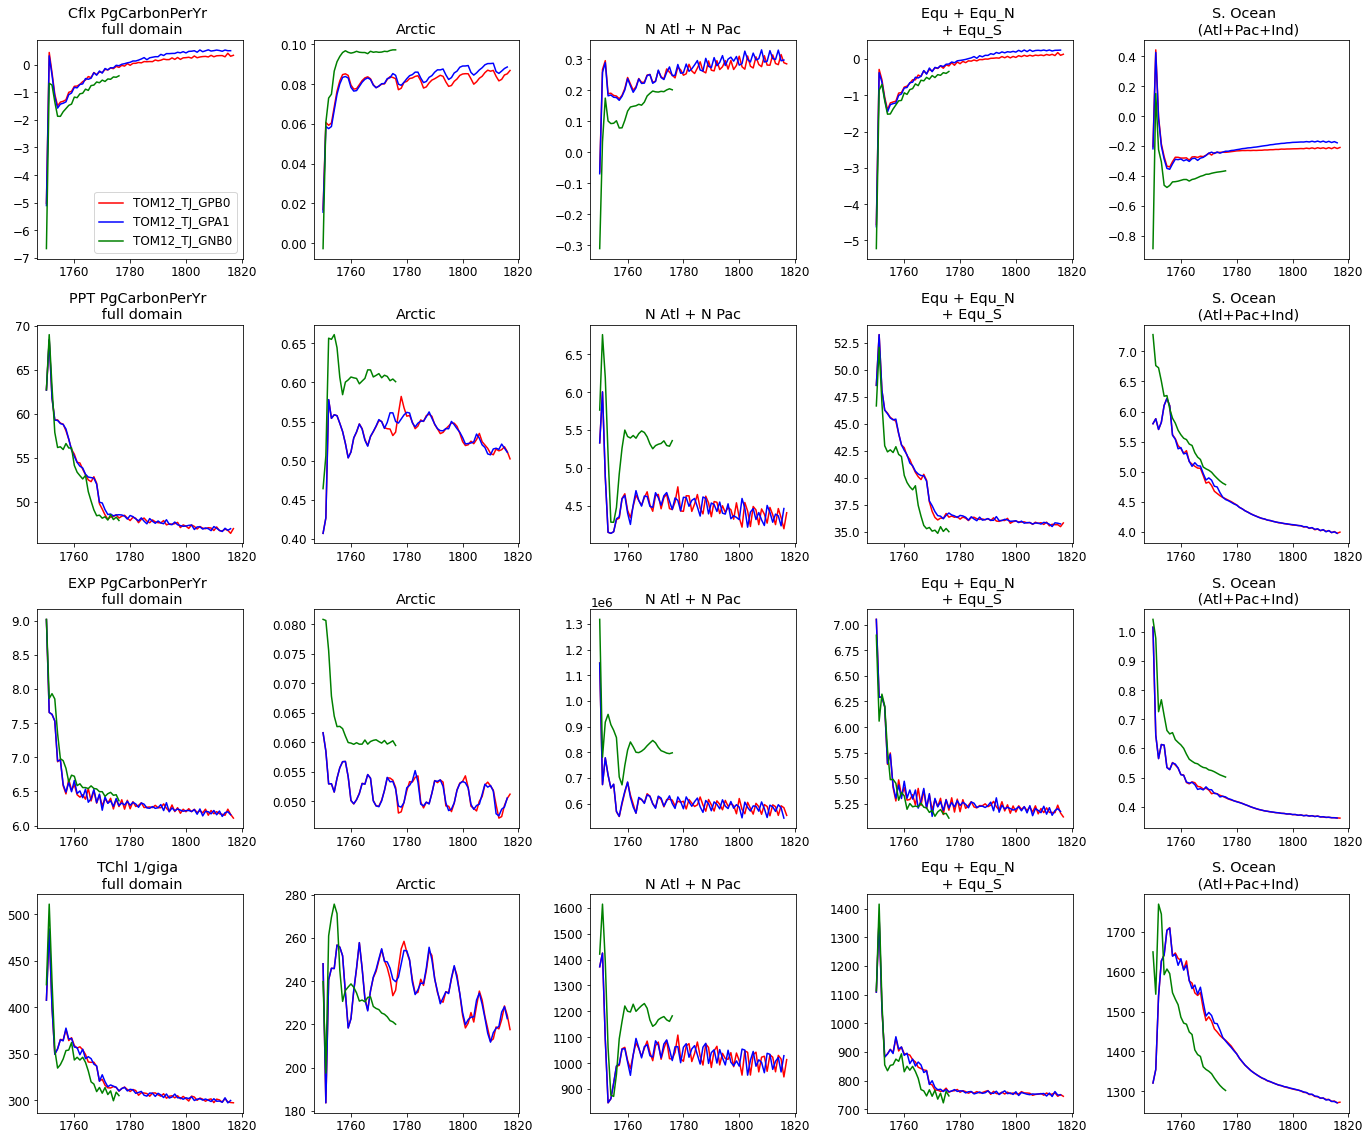

In [67]:
mods_to_plot = ['TOM12_TJ_GPB0', 'TOM12_TJ_GPA1', 'TOM12_TJ_GNB0']

def plot_sum(df, fig, axs, tcol = 'red', tlab = 'G101 (orig ERA)'):
    ind = 0
    axs[0+ind].plot(df.year, df.Cflx_total, color = tcol, label = tlab); 
    axs[1+ind].plot(df.year, df.Cflx_Arctic, color = tcol); 
    axs[2+ind].plot(df.year, df.Cflx_NANP, color = tcol); 
    axs[3+ind].plot(df.year, df.Cflx_Equ_tot, color = tcol); 
    axs[4+ind].plot(df.year, df.Cflx_SO, color = tcol); 
    ind = 5
    axs[0+ind].plot(df.year, df.PPT_total, color = tcol);
    axs[1+ind].plot(df.year, df.PPT_Arctic, color = tcol); 
    axs[2+ind].plot(df.year, df.PPT_NANP, color = tcol); 
    axs[3+ind].plot(df.year, df.PPT_Equ_tot, color = tcol); 
    axs[4+ind].plot(df.year, df.PPT_SO, color = tcol); 
    ind = 10
    axs[0+ind].plot(df.year, df.EXP_total, color = tcol); 
    axs[1+ind].plot(df.year, df.EXP_Arctic, color = tcol); 
    axs[2+ind].plot(df.year, df.EXP_NANP, color = tcol); 
    axs[3+ind].plot(df.year, df.EXP_Equ_tot, color = tcol); 
    axs[4+ind].plot(df.year, df.EXP_SO, color = tcol); 
    ind = 15
    axs[0+ind].plot(df.year, df.TChl_total, color = tcol); 
    axs[1+ind].plot(df.year, df.TChl_Arctic, color = tcol); 
    axs[2+ind].plot(df.year, df.TChl_NANP, color = tcol); 
    axs[3+ind].plot(df.year, df.TChl_Equ_tot, color = tcol); 
    axs[4+ind].plot(df.year, df.TChl_SO, color = tcol); 
    axs[0].legend()

def plot_summary(mods_to_plot, fignam = 'multimodel_monitor.jpg'):
    cols = ['r','b','g','y','k','c']
    fact = 1.6
    fig, axs = plt.subplots(4,5, figsize=(12*fact, 10*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    axs[0].set_title('Cflx PgCarbonPerYr \n full domain'); axs[1].set_title('Arctic'); axs[2].set_title('N Atl + N Pac')
    axs[3].set_title('Equ + Equ_N \n + Equ_S'); axs[4].set_title('S. Ocean \n (Atl+Pac+Ind)')
    ind = 5
    axs[0+ind].set_title('PPT PgCarbonPerYr \n full domain'); axs[1+ind].set_title('Arctic')
    axs[2+ind].set_title('N Atl + N Pac'); axs[3+ind].set_title('Equ + Equ_N \n + Equ_S'); axs[4+ind].set_title('S. Ocean \n (Atl+Pac+Ind)')
    ind = 10
    axs[0+ind].set_title('EXP PgCarbonPerYr \n full domain'); axs[1+ind].set_title('Arctic')
    axs[2+ind].set_title('N Atl + N Pac'); axs[3+ind].set_title('Equ + Equ_N \n + Equ_S'); axs[4+ind].set_title('S. Ocean \n (Atl+Pac+Ind)')
    ind = 15
    axs[0+ind].set_title('TChl 1/giga \n full domain'); axs[1+ind].set_title('Arctic')
    axs[2+ind].set_title('N Atl + N Pac'); axs[3+ind].set_title('Equ + Equ_N \n + Equ_S'); axs[4+ind].set_title('S. Ocean \n (Atl+Pac+Ind)')

    for q in range(0,len(mods_to_plot)):
        tmod = mods_to_plot[q]
        sumdir = '/gpfs/data/greenocean/software/runs/modelMonitor/summarycsv/'
        try: 
            modsum = pd.read_csv(f'{sumdir}{tmod}_breakdown.csv')
            plot_sum(modsum, fig, axs, tcol = cols[q], tlab = tmod)
            print('plotted')
        except:
            print(f'didnt find {tmod} in model summaries')


    axs[0].legend(loc = 'best')


    plt.tight_layout()
    fig.savefig(f'/gpfs/home/mep22dku/scratch/ModelRuns/modelBreakdownSummaries/{fignam}')
    
plot_summary(mods_to_plot)

In [10]:
varco2 = '/gpfs/home/mep22dku/scratch/GCB2023_atmco2/gcbco2_2023_4200_v2_padding.dat'
co2_variable = pd.read_csv(varco2, sep='\t', lineterminator='\n')

statco2 = '/gpfs/data/greenocean/software/resources/ModelResources/AtmosCO2/atmco2_dw_edit_4200_v3_CONSTANT_1750.dat'
co2_static = pd.read_csv(statco2, sep='\t', lineterminator='\n')



In [11]:
co2_variable

,1650.042,276.58,277.682437,693.3
0,1650.125,276.580,277.682437,693.293333
1,1650.209,276.590,277.682437,693.286667
2,1650.292,276.590,277.682437,693.280000
3,1650.375,276.590,277.682437,693.273333
4,1650.459,276.590,277.682437,693.266667
...,...,...,...,...
4948,2493.500,1961.577,527.000000,3481.000000
4949,2494.500,1961.577,527.000000,3481.000000
4950,2495.500,1961.577,527.000000,3481.000000
4951,2496.500,1961.577,527.000000,3481.000000


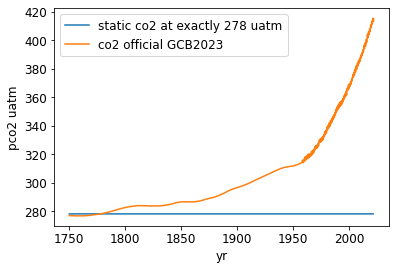

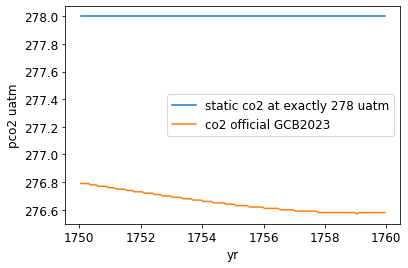

In [51]:
varco2 = '/gpfs/home/mep22dku/scratch/GCB2023_atmco2/gcbco2_2023_4200_v2_padding.dat'
co2_variable = pd.read_csv(varco2, sep='\t', lineterminator='\n')

statco2 = '/gpfs/data/greenocean/software/resources/ModelResources/AtmosCO2/atmco2_dw_edit_4200_v3_CONSTANT_1750.dat'
co2_static = pd.read_csv(statco2, sep='\t', lineterminator='\n')


statyr = co2_static['1650.042']
statco2 = co2_static['276.58']

varyr = co2_variable['1650.042']
varco2 = co2_variable['276.58']

plt.figure()
spinupyr = (statyr >=1750) & (statyr <=2022)
plt.plot(statyr[spinupyr] , statco2[spinupyr], label = 'static co2 at exactly 278 uatm')
spinupyr = (varyr >=1750) & (varyr <=2022)
plt.plot(varyr[spinupyr] , varco2[spinupyr], label = 'co2 official GCB2023')
plt.ylabel('pco2 uatm'); plt.xlabel('yr'); plt.legend()

plt.figure()
spinupyr = (statyr >=1750) & (statyr <=1760)
plt.plot(statyr[spinupyr] , statco2[spinupyr], label = 'static co2 at exactly 278 uatm')
spinupyr = (varyr >=1750) & (varyr <=1760)
plt.plot(varyr[spinupyr] , varco2[spinupyr], label = 'co2 official GCB2023')
plt.ylabel('pco2 uatm'); plt.xlabel('yr'); plt.legend()